Profiling and checking out the data that alkos catalog provides. Creating kpi that provides the best bang for your buck

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [90]:
#Reading the file into a dataframe

df = pd.read_excel('/Users/attesukari/Documents/Alkospark/alkon-hinnasto-tekstitiedostona (1).xlsx')

df.head()

,Numero,Nimi,Valmistaja,Puokoko,Hinta,Litrahinta,Uutuus,Hinnastojärjestyskoodi,Tyyppi,Alatyyppi,...,Suljentatyyppi,Alkoholiprosentti,Hapot g/l,Sokeri g/l,Kantavierrep-%,Väri EBC,Katkerot EBU,Energia kcal/100 ml,Valikoima,EAN
0,915083,Ecologica Reserve Organic Shiraz Malbec 2019,La Riojana,0.75,10.48,13.84,NaN,110,punaviinit,Mehevä & Hilloinen,...,metallinen kierrekapseli,13.0,5.2,4.0,NaN,NaN,NaN,80.0,tilausvalikoima,7790265620145
1,906458,Fair & Square Red 2021 kartonkitölkki,La Riojana,1.00,10.89,10.89,NaN,110,punaviinit,Mehevä & Hilloinen,...,muovisuljin,13.0,5.2,3.0,NaN,NaN,NaN,70.0,vakiovalikoima,7350084980013
2,951667,Raza Selection Malbec Shiraz Organic 2017,La Riojana,0.75,12.98,17.17,NaN,110,punaviinit,Mehevä & Hilloinen,...,synteettinen korkki,13.0,4.9,7.0,NaN,NaN,NaN,80.0,vakiovalikoima,7790265060835
3,489367,Achaval Ferrer Quimera 2010,Achaval Ferrer,0.75,49.94,66.59,NaN,110,punaviinit,Vivahteikas & Kehittynyt,...,luonnonkorkki,14.0,6.5,1.0,NaN,NaN,NaN,80.0,erikoiserä,7798091111035
4,440567,Alamos Malbec Organic 2021,Alamos,0.75,11.49,15.19,NaN,110,punaviinit,Mehevä & Hilloinen,...,metallinen kierrekapseli,13.5,5.2,2.0,NaN,NaN,NaN,80.0,vakiovalikoima,7794450004871


Line graph: 


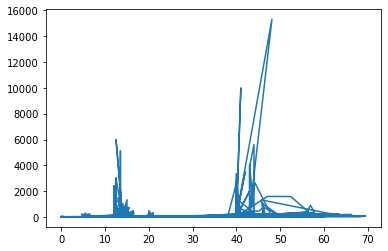

In [91]:
#Checking out with kind alcohol% bevrages cost the most. We can see spike between 10-10% and also around 40-55.
# This is mainly due to the fact that the most expensive products are wines and whiskeys/cognags.  
print("Line graph: ")
plt.plot(df["Alkoholiprosentti"], df["Hinta"])
plt.show()

In [138]:
#create an indicator that would provide the highest alcohol content per container with the lowest cost
df = df.drop_duplicates(subset=['Nimi'])
df1 = df.assign(indexi = (df['Puokoko'] * df['Alkoholiprosentti']))
df2 = df1.assign(indikaattori = (df['indexi'] / df['Hinta']))
df3 = df2.where(df.Alkoholiprosentti > 1)
df_sorted = df3.sort_values('indikaattori', ascending=False)
print(df_sorted)

        Numero                                               Nimi  \
412   440668.0            Liisa Cabernet Sauvignon kartonkitölkki   
149   410948.0                  Pirkko Shiraz 2020 kartonkitölkki   
1404  942748.0    Evergreen Rosso Terre Siciliane 2019 muovipullo   
8400  950164.0                  Naughty Brgr Red Wine hanapakkaus   
9073  319027.0                                 Gambina muovipullo   
...        ...                                                ...   
6367  916986.0  The Macallan Red Collection 40 Years Old Singl...   
2357  946892.0                                        Le Pin 2014   
2331  422657.0                   Grand Vin de Château Latour 1926   
8383  833411.0                                    Mon Chéri 262 g   
7940       NaN                                                NaN   

                   Valmistaja  Puokoko     Hinta  Litrahinta  Uutuus  \
412           Stella Wines Oy     1.00      9.19        9.19     NaN   
149               Astra Win

Line graph: 


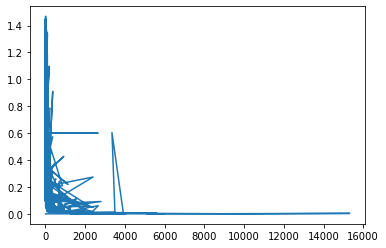

In [139]:
#We can see that the indikaattori kpi works because the closer we get to zero, the more higher value the indikaattori gets
print("Line graph: ")
plt.plot(df_sorted["Hinta"], df["indikaattori"])
plt.show()

In [140]:
#Saving the file to an excelfile
filename = 'Tehokkainjuoma.xlsx'
df_sorted.to_excel(filename)

In [137]:
df1 = df_sorted.drop_duplicates(subset=['Nimi'])
df_viinat = df1[df_sorted['Tyyppi'].str.contains('vodkat ja viinat', na = False)]
print(df_viinat)

         Numero                               Nimi  \
11738  104527.0             Tapio Viina muovipullo   
11726  177817.0               Sisuviina muovipullo   
11717  159097.0       Saunalahden Viina muovipullo   
11731  103828.0             Suomi Viina muovipullo   
11751  951038.0               Laua Viin muovipullo   
...         ...                                ...   
11645  950131.0  Kaiho Single Estate Organic Vodka   
11578  943193.0           Crystal Head Vodka Pride   
11579  911226.0                 Fen Jiu Qinghua 20   
11650  902847.0          Koskenkorva Foraged Vodka   
11580  926606.0       Kweichow Moutai Flying Fairy   

                                              Valmistaja  Puokoko   Hinta  \
11738                              Pernod Ricard Finland     0.70   19.88   
11726                                              Altia     0.70   19.49   
11717                              Pernod Ricard Finland     0.70   19.59   
11731                              Pernod R

/var/folders/mp/yl0xmx3x4q32803lr0n6g9sh0000gn/T/ipykernel_34583/2228348984.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_viinat = df1[df_sorted['Tyyppi'].str.contains('vodkat ja viinat', na = False)]
